<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Frequentist vs. Bayesian Statistics and the t-test

Week 3 | 1.2

---


## "Bayesian" vs. "Frequentist"

"Bayesian" statistics has been getting a lot of hype in recent years (with good reason), but it is easy to forget that both types of statistics are correct, they just focus on different things.

We will go deeper into Bayesian stats later in the course; for now we will explore the differences between the two approaches to probability.

The overarching goal of both approaches is the same:

---

**We want to make a statement about ALL data points (the population) based on a SAMPLE of data points, and describe our UNCERTAINTY about that statement.**

---

### Estimating a mean value

Say we want to measure the **mean height of male professional athletes**. We measure the height of 100 different athletes and thus have 100 data points in our sample.

Our scenario:

- We want to make a statement about the mean height of **ALL** male professional athletes.
- We only have a **sample** of 100 measured heights from that **population**.

### Estimating the mean height from a Bayesian approach...

As a **Bayesian** my approach will be to make a statement about the probability of the mean height given the data I have:

- The mean height of all male professional athletes is indeed a single value, but I only have a subset of the measurements.
- I have a belief about how tall these athletes are.
- I am going to make a statement about the probability the height is a value given the information I have.

- I have 100 observations, or data points, that I will use to **update** my "prior" belief about the heights.

- I have collected **fixed data** which I use to update my inference of the probability for the mean height, which is called my **posterior distribution** of mean heights.
- Thus, there is a **distribution of values for the true mean height with varying probability.**

### Estimating the mean height from a Frequentist approach...

As a **Frequentist** I believe:

- The mean height of male professional athletes is an unknown but **fixed, "true" value**.

- My 100 data points are a **random sample.** That is to say, I have collected **at random** 100 heights from the **population pool**.

- This random sampling procedure is considered **infinitely repeatable**. My inferences about height are based on the idea that this sample is just one of an infinite number of hypothetical population samples.

- Our **data sampled is random**, but the **true value of height is fixed** across all hypothetical samples.
- There is **a distribution of possible samples given the true fixed value**.

### The inverse approaches

**FREQUENTISTS** ask:

### $$P(\text{data}\;|\;\text{true mean})$$

What is the probability of our data given a true and fixed population mean?

---

**BAYESIANS** ask:

### $$P(\text{true mean}\;|\;\text{data})$$

What is the probability of the true mean given the data that we have?



### Pros and cons to both

**Bayesian methods**:

- Pros: Inference on measure is more intuitive. No "absurd" results. Does not require the hypothetical "infinite sampling".
- Cons: Computationally intensive. Does not "guarantee" success rate of experiments. Requires prior belief.

---

** Frequentist methods:**

- Pros: Requires no justification of prior belief. Direct analogy to experimental design theory. Not as computationally expensive.
- Cons: Inference not as intuitive. Requires "asymptotic" sampling axioms. Allows "absurd" results (it is ok if some of the "experiments" are nonsense as long as most are correct.)

## Hypothesis testing with frequentist methods

**Frequentist** methods lend themselves well to the idea of experimental design. For example, say we are testing a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- Our sample is selected from the broader, unknown population pool.
- In a parallel world we could have ended up with any random sample from the population pool of 100 people.


### The "null hypothesis"

The **null hypothesis** is a fundamental concept for Frequentist statistical tests. We can define this as **H0**. 

The null hypothesis is, in this example, the hypothesis that there is no difference between placebo and treatment.

**H0:** The measured difference is equal to zero.

The **alternative hypothesis** is the other possible outcome of the experiment: the difference between the placebo and the treatment is real.

**H1:** The measured parameter is different not zero (greater than or less than zero for two-tailed, and one or the other for one-tailed tests).

### The p-value

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would have sampled the current set of data. 

---

Say in our experiment we follow-up with the experimental and control groups:

- 5 out of 50 patients in the control group indicate that their symptoms are better
- 20 out of 50 patients in the experimental group indicate that their symptoms are better

The **p-value** would be the **probability that we measured this rate of recovery over placebo in our experiment (400%) given that in fact there is no difference in recovery rate.**

### Calculating the probability the null hypothesis is true: the t-test

Recall that as Frequentist we want to know:

### $$P(\text{data}\;|\;\text{true mean})$$

We obviously don't know the true mean difference in rate of recovery. Instead, **we will assume that the true mean difference is zero: the null hypothesis H0:**

### $$P(\text{data}\;|\;\text{true mean}=0)$$

This is known as the **likelihood**.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
# Create the experimental and control group results

# Control: 5 people got better, 45 did not:
control = np.concatenate((np.zeros(45), np.ones(5)))

# Experimental: 20 people got better, 30 did not:
experimental = np.concatenate((np.zeros(30), np.ones(20)))

# calculate the difference in recovery rates:
experimental_rate = np.mean(experimental)
control_rate = np.mean(control)

rate_difference = experimental_rate - control_rate
print rate_difference

0.3


### t-tests: calculating the t-statistic

---

How do we calculate the p-value, or significance of our experimental results? For comparing two means (as is the case in this example: the mean difference in symptoms between conditions) we can use the **t-test**, which uses **t-statistics**.

The p-value will be a conversion of the two-sample t-test **t-statistic**, which we calculate first:

### $$t = \frac{mean(sample_E) - mean(sample_C)}{\sqrt {\big(\frac{(var(sample_E)}{n_E} + \frac{var(sample_C)}{n_C}\big)}}$$

**Calculate the t-statistic for the difference in rates:**

[For a gentle overview, see http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics]


In [3]:
exp_var = np.var(experimental)
con_var = np.var(control)

t_stat = (experimental_rate - control_rate) / np.sqrt( (exp_var/len(experimental)) + (con_var)/len(control))
print t_stat

3.69274472938


- The numerator: the difference between the mean of your sample and the hypothesized mean. Recall that our hypothesized mean is the null hypothesis H0. This is the **difference in means**.

- The denominator: the standard deviation of your sample measurements divided by the square root of your sample size. This is the **standard error of the mean**. 

### Plotting the t-statistic

From the central limit theorem, we know that (with enough samples), the distribution of means is normal. In the case of smaller sample sizes, [we adjust this to be a more conservative student-t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student-t distribution centered on zero, which corresponds to our null hypothesis.

In [4]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
ypoints = stats.t.pdf(xpoints, 50, 0, 1)

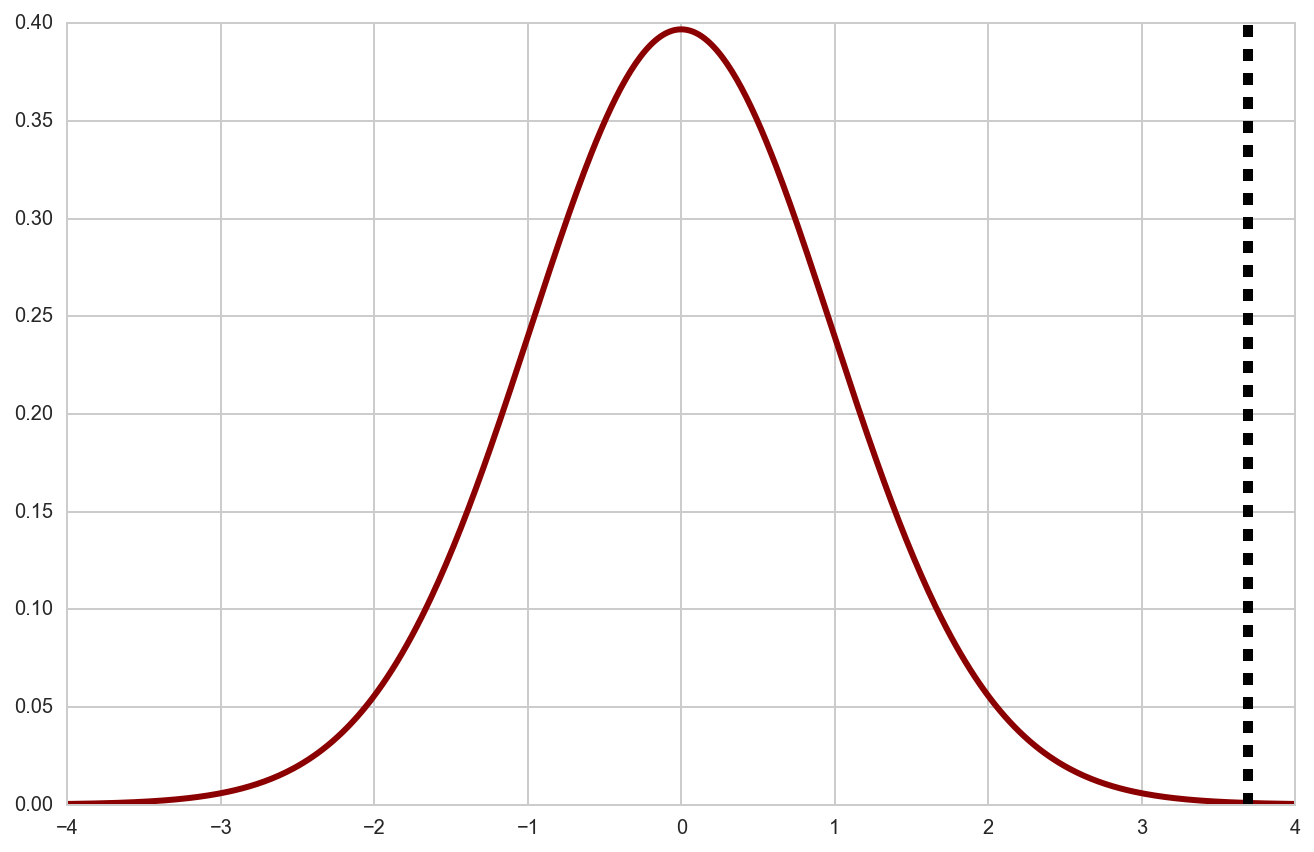

In [5]:
# initialize a matplotlib "figure"
fig = plt.figure(figsize=(11,7))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

In [6]:
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=3.6556307750696551, pvalue=0.00041473769762161242)

### Alternative view of the t-statistic

The t-statistic measures the **signal to noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean minus the hypothesized mean **H0**.

**The noise** is the **variation in our data**. This is how much our measurements vary (measured by the standard deviation), with a penalty for smaller sample sizes (the square root of the sample size).

Let's explore how variance, or noise, affects our ability to detect true differences.


In [7]:
# Generate two weight samples, male and female.
# The weights are drawn from normal distributions with a mean and standard deviation.

# example weight distribution: mean=100, standard deviation=15
example_weight_sample = np.random.normal(100, 15, size=100)
print example_weight_sample[0:10]



[  76.96525796   97.86928999  101.13282173  103.74156782  113.27642872
  118.19887757  104.71721478  101.81708832   84.94671515  106.80027652]


In [8]:
# For each of male and female measurements, take 50 measurements for each by setting: size=50

# Create the male weight sample from distribution: 
# mean = 175, standard deviation = 20

# Create the female weight sample from distribution: 
# mean = 120, standard deviation = 15


In [9]:
male = np.random.normal(175, 20, size=50)
female = np.random.normal(120, 15, size=50)

Ttest_indResult(statistic=15.545309899943808, pvalue=3.3612966873304961e-28)


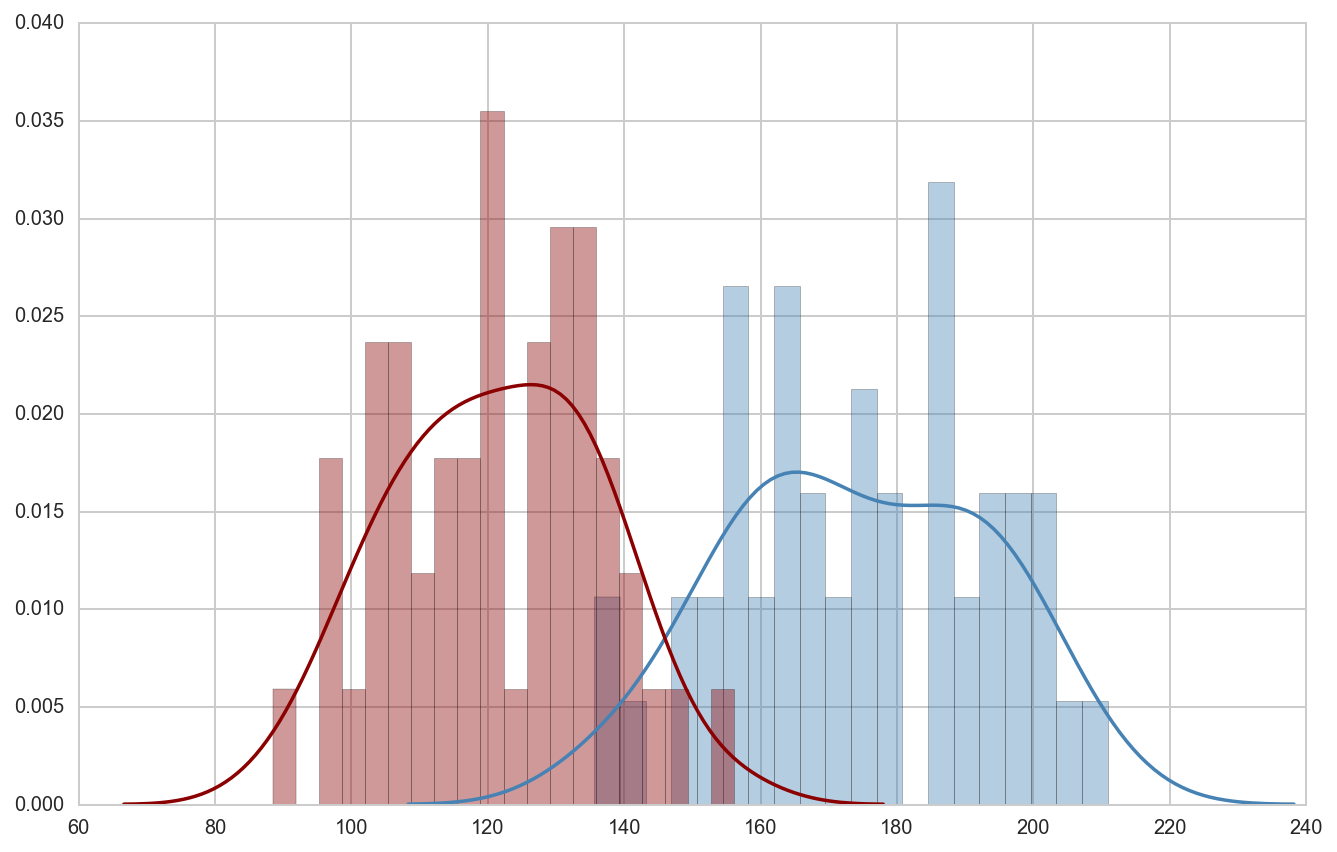

In [10]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(11,7))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot the males:
ax = sns.distplot(male, bins=20, color='steelblue', ax=ax)

# create another distribution on the same axis for females:
sns.distplot(female, bins=20, color='darkred', ax=ax)

# calculate the p-value
print stats.ttest_ind(male, female)

### Increase the noise

What if the noise increased from more variation in weight?

Increase the standard deviation on male and female distributions of weight to 100.

Draw new samples and recreate the distribution plots. What happens? Calculate the p-value from the `stats.ttest_ind()` function.

Ttest_indResult(statistic=3.9707747546172749, pvalue=0.00013672775277260541)


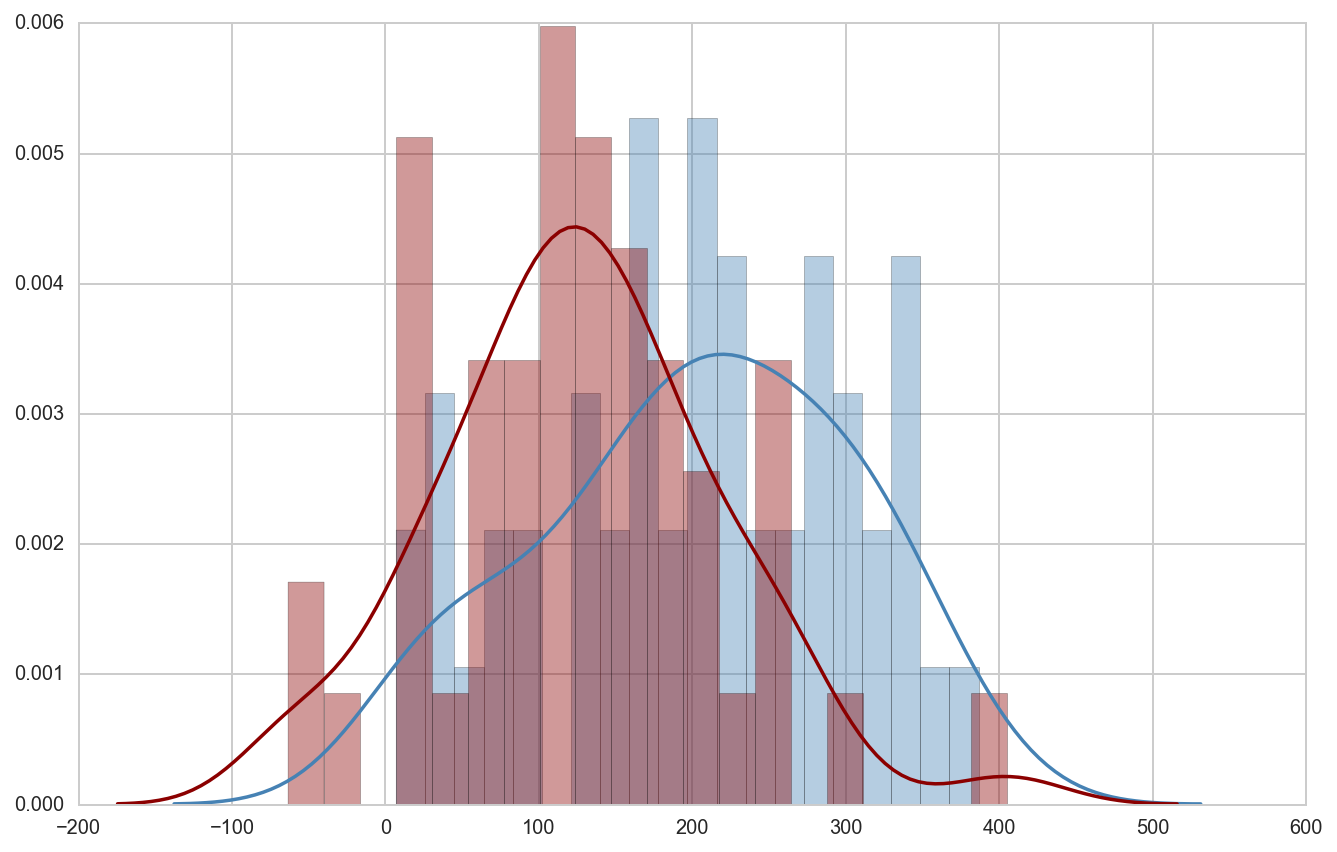

In [11]:
male = np.random.normal(175, 100, size=50)
female = np.random.normal(120, 100, size=50)

# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(11,7))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot the males:
ax = sns.distplot(male, bins=20, color='steelblue', ax=ax)

# create another distribution on the same axis for females:
sns.distplot(female, bins=20, color='darkred', ax=ax)

print stats.ttest_ind(male, female)

### More noise = greater N required

If we want to detect a difference with confidence with this new amount of noise, we will need to have a greater sample size.

Increase the sample size collected for males and females to 1000 each. Keep the standard deviations the same.

Draw new samples and recreate the distribution plots. What happens now?

Ttest_indResult(statistic=11.360665746362686, pvalue=4.9973423882075672e-29)


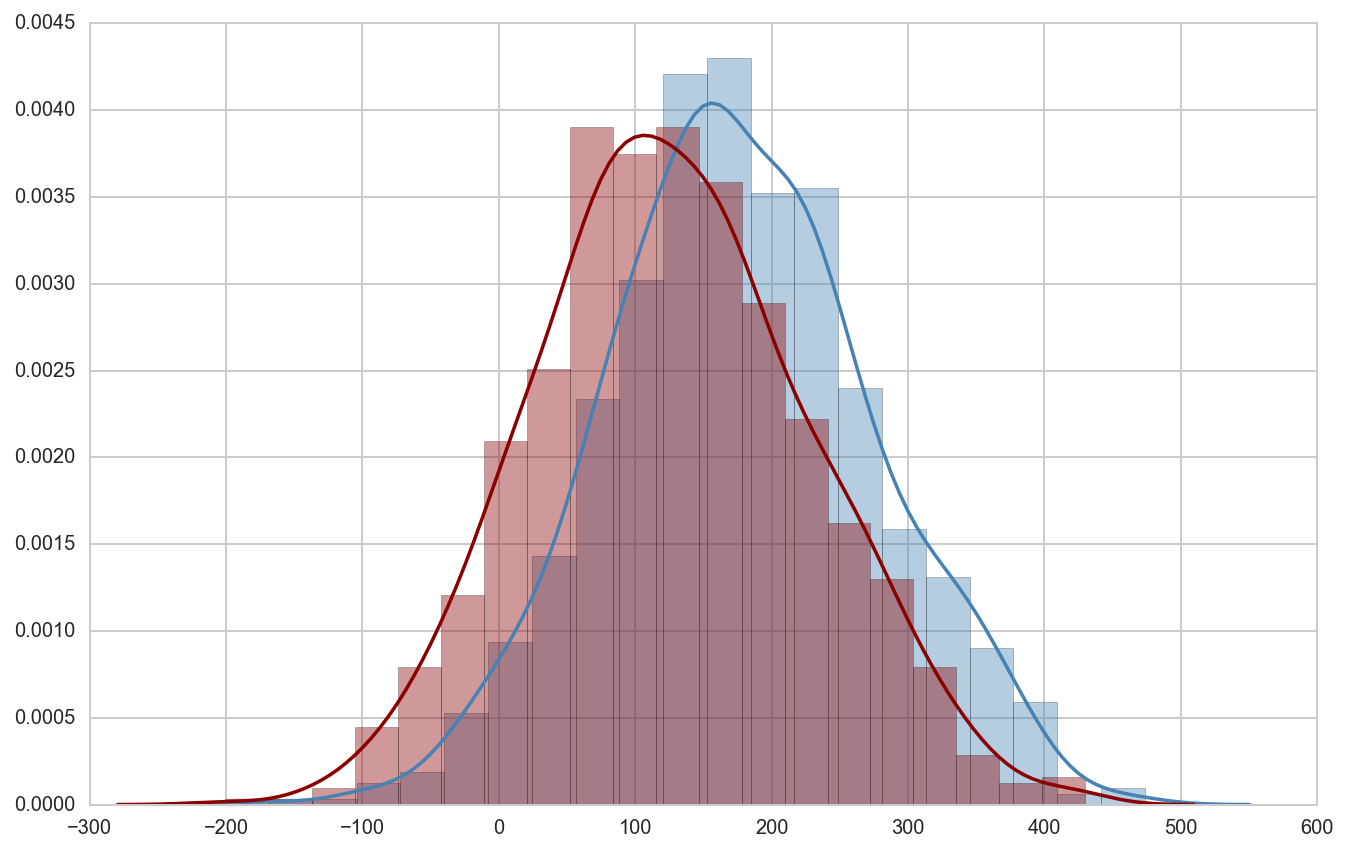

In [12]:
male = np.random.normal(175, 100, size=1000)
female = np.random.normal(120, 100, size=1000)

# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(11,7))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot the males:
ax = sns.distplot(male, bins=20, color='steelblue', ax=ax)

# create another distribution on the same axis for females:
sns.distplot(female, bins=20, color='darkred', ax=ax)

print stats.ttest_ind(male, female)